<a href="https://colab.research.google.com/github/piragashparam36/Eigen-Image-Face-Recognition-System./blob/main/Eigen_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pillow

In [ ]:
# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage import data
from skimage.color import rgb2gray
from PIL import Image
import pandas as pd

In [ ]:
def read_images_from_folder(folder_path):
    image_data = []
    image_labels = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Specify image formats
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)  # Open image
            img = img.resize((64,64))  # Resize to a common size if needed
            img_array = np.array(img)   # Convert image to array

            # Convert RGB to grayscale
            if len(img_array.shape) == 3:
                if img_array.shape[2] == 4: #check if it has an alpha channel (for PNG)
                    img = img.convert('RGB') # convert to RGB
                    img_array = np.array(img)
                img_array = rgb2gray(img_array)  # Convert RGB to grayscale

            img_flat = img_array.flatten()  # Flatten the array (2D to 1D)
            image_data.append(img_flat)  # Store pixel data

            # extract labels from filename
            label = filename.split('_')[0]  # Assume label is the prefix in filename
            image_labels.append(label)

    # Create DataFrame
    df = pd.DataFrame(image_data)

    # Add labels as an additional column (if using labels)
    if image_labels:
        df['label'] = image_labels

    return df

In [ ]:
# Access the file in Drive
df = read_images_from_folder(folder_path="/content/drive/My Drive/Faces/")

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,0.836731,0.844574,0.848495,0.856338,0.868103,0.875946,0.875946,0.872307,0.879868,0.883789,...,0.730249,0.729133,0.725509,0.724125,0.708439,0.703402,0.700856,0.715464,0.709287,Person 3.jpg
1,0.629794,0.633716,0.641559,0.645480,0.649402,0.653324,0.655273,0.662000,0.665088,0.665922,...,0.559531,0.614968,0.738792,0.837434,0.888773,0.919938,0.950262,0.963195,0.974141,Person 1.jpg
2,0.209338,0.213542,0.214108,0.218029,0.230650,0.244387,0.248874,0.251947,0.259791,0.260356,...,0.003654,0.003654,0.003654,0.003654,0.003654,0.003654,0.003654,0.003654,0.003654,Person 2.jpg
3,0.854709,0.862553,0.862553,0.865618,0.867590,0.878239,0.879072,0.875128,0.878216,0.881304,...,0.058035,0.054113,0.049626,0.042616,0.037579,0.053831,0.062239,0.056636,0.052149,Person 4.jpg
4,0.152376,0.207278,0.207278,0.148454,0.117082,0.109238,0.105317,0.121569,0.133051,0.160524,...,0.505882,0.562734,0.374498,0.105049,0.103077,0.133333,0.109804,0.098039,0.090196,Person 5.jpg


In [ ]:
df.shape

(5, 4097)

In [ ]:
# Calculate the mean of only the numeric columns
column_means = df.drop('label', axis=1).mean(axis=0)
print(column_means)

0       0.536590
1       0.552332
2       0.554798
3       0.546784
4       0.546565
          ...   
4091    0.348304
4092    0.362831
4093    0.365363
4094    0.367398
4095    0.365885
Length: 4096, dtype: float64


In [ ]:
#Centerized Face
# Subtract the mean from each column
df_normalized = df.drop('label', axis=1) - column_means
df_normalized['label'] = df['label']  # Add the label column back
df_normalized


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,0.300141,0.292241,0.293697,0.309554,0.321538,0.323719,0.323050,0.315717,0.316665,0.313410,...,0.358779,0.336213,0.347093,0.381550,0.360135,0.340570,0.335493,0.348066,0.343402,Person 3.jpg
1,0.093205,0.081383,0.086760,0.098696,0.102837,0.101097,0.102376,0.105410,0.101886,0.095542,...,0.188060,0.222048,0.360376,0.494858,0.540468,0.557106,0.584899,0.595797,0.608256,Person 1.jpg
2,-0.327252,-0.338790,-0.340691,-0.328755,-0.315915,-0.307840,-0.304022,-0.304643,-0.303412,-0.310023,...,-0.367816,-0.389267,-0.374762,-0.338922,-0.344651,-0.359178,-0.361709,-0.363744,-0.362232,Person 2.jpg
3,0.318120,0.310220,0.307754,0.318834,0.321025,0.326012,0.326176,0.318538,0.315013,0.310925,...,-0.313435,-0.338807,-0.328790,-0.299959,-0.310725,-0.309001,-0.303124,-0.310761,-0.313736,Person 4.jpg
4,-0.384214,-0.345055,-0.347521,-0.398330,-0.429484,-0.442988,-0.447580,-0.435022,-0.430152,-0.409855,...,0.134412,0.169813,-0.003917,-0.237527,-0.245227,-0.229498,-0.255559,-0.269358,-0.275689,Person 5.jpg


In [ ]:
# Finding the correlation matrix
correlation_matrix = df_normalized.drop('label', axis=1).corr()

In [ ]:
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1.000000,0.998487,0.998604,0.999870,0.998323,0.997106,0.996471,0.997198,0.997362,0.998819,...,0.220771,0.216741,0.166566,0.330302,0.491203,0.473525,0.462469,0.473816,0.477075,0.473498
1,0.998487,1.000000,0.999952,0.997641,0.993819,0.991598,0.990506,0.991671,0.992043,0.994955,...,0.244608,0.241485,0.192302,0.342302,0.487147,0.468593,0.458556,0.468537,0.471251,0.467171
2,0.998604,0.999952,1.000000,0.997856,0.994126,0.991868,0.990794,0.992023,0.992374,0.995208,...,0.250236,0.246925,0.198007,0.349630,0.495142,0.476828,0.466868,0.476892,0.479598,0.475570
3,0.999870,0.997641,0.997856,1.000000,0.999058,0.998027,0.997492,0.998144,0.998291,0.999413,...,0.222961,0.218689,0.168148,0.335092,0.499024,0.481390,0.469979,0.481448,0.484856,0.481353
4,0.998323,0.993819,0.994126,0.999058,1.000000,0.999783,0.999588,0.999819,0.999884,0.999923,...,0.207523,0.202749,0.150802,0.326319,0.501007,0.483464,0.470887,0.483055,0.486965,0.483728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,0.473525,0.468593,0.476828,0.481390,0.483464,0.476266,0.475834,0.482671,0.482707,0.481780,...,0.797722,0.783931,0.777060,0.935992,0.998533,1.000000,0.999210,0.998388,0.998664,0.997977
4092,0.462469,0.458556,0.466868,0.469979,0.470887,0.463180,0.462613,0.469858,0.469772,0.469272,...,0.799992,0.786042,0.782169,0.938618,0.996219,0.999210,1.000000,0.999317,0.999112,0.998608
4093,0.473816,0.468537,0.476892,0.481448,0.483055,0.475775,0.475425,0.482561,0.482245,0.481078,...,0.777801,0.763215,0.759602,0.925639,0.994169,0.998388,0.999317,1.000000,0.999915,0.999815
4094,0.477075,0.471251,0.479598,0.484856,0.486965,0.479911,0.479640,0.486631,0.486322,0.484908,...,0.774344,0.759709,0.755256,0.923300,0.994728,0.998664,0.999112,0.999915,1.000000,0.999907


In [ ]:
#correlation_matrix = df.drop('label', axis=1).corr()

In [ ]:
# correlation_matrix

df and df_normalized are same because it will never change the relationship

In [ ]:
# X = df_normalized.drop('label', axis=1)
# Y = df_normalized['label']

In [ ]:
# this numpy method have round off error problem so this method is not good because eigen values will not be an imaginary value

# Perform eigenvalue decomposition
eigenvalues1, eigenvectors1 = np.linalg.eig(correlation_matrix)


In [ ]:
eigenvalues1

array([ 1.61512398e+03+0.00000000e+00j,  1.24328810e+03+0.00000000e+00j,
        7.03073242e+02+0.00000000e+00j, ...,
       -1.37318959e-16+0.00000000e+00j, -2.92391215e-16+1.86801375e-17j,
       -2.92391215e-16-1.86801375e-17j])

In [ ]:
eigenvalues1.shape

(4096,)

In [ ]:
 eigenvectors1

array([[ 2.20786660e-02+0.00000000e+00j, -1.07887181e-02+0.00000000e+00j,
        -9.82791914e-03+0.00000000e+00j, ...,
        -5.78525429e-04+0.00000000e+00j, -1.92568455e-03-1.73032583e-04j,
        -1.92568455e-03+1.73032583e-04j],
       [ 2.25710105e-02+0.00000000e+00j, -9.79645008e-03+0.00000000e+00j,
        -8.96188786e-03+0.00000000e+00j, ...,
         4.72927753e-04+0.00000000e+00j,  6.42915919e-05-6.80183851e-06j,
         6.42915919e-05+6.80183851e-06j],
       [ 2.25232724e-02+0.00000000e+00j, -9.74885667e-03+0.00000000e+00j,
        -9.31642214e-03+0.00000000e+00j, ...,
        -4.36702133e-04+0.00000000e+00j, -7.67593438e-05-1.42717501e-05j,
        -7.67593438e-05+1.42717501e-05j],
       ...,
       [ 8.55351499e-03+0.00000000e+00j,  5.27217093e-03+0.00000000e+00j,
        -3.45732379e-02+0.00000000e+00j, ...,
         9.19421554e-04+0.00000000e+00j, -1.93918510e-03+3.31601292e-03j,
        -1.93918510e-03-3.31601292e-03j],
       [ 8.58159836e-03+0.00000000e+00j,  5.

In [ ]:
from scipy.linalg import eigh

# Perform eigenvalue decomposition
eigenvalues, eigenvectors = eigh(correlation_matrix)

scipy.linalg.eigh. This function is specifically designed for Hermitian matrices, which include real symmetric matrices as a special case. It is generally more numerically stable for this type of matrix and will guarantee real eigenvalues.

In [ ]:
eigenvalues

array([-1.84031688e-12, -1.66522900e-12, -1.53457632e-12, ...,
        7.03073242e+02,  1.24328810e+03,  1.61512398e+03])

In [ ]:
eigenvectors

array([[ 3.42755223e-07,  6.84556187e-04, -4.51424790e-03, ...,
        -9.82791914e-03,  1.07887181e-02, -2.20786660e-02],
       [ 8.31130693e-03, -1.04502906e-01,  6.17045965e-01, ...,
        -8.96188786e-03,  9.79645008e-03, -2.25710105e-02],
       [-6.53719896e-02, -2.21917967e-02, -2.35342302e-01, ...,
        -9.31642214e-03,  9.74885667e-03, -2.25232724e-02],
       ...,
       [-8.62446312e-03, -2.02090495e-03, -6.20848257e-04, ...,
        -3.45732379e-02, -5.27217093e-03, -8.55351499e-03],
       [-1.48388794e-02, -2.29595853e-02,  2.72089818e-03, ...,
        -3.46331830e-02, -5.12806797e-03, -8.58159836e-03],
       [-3.94746276e-03, -3.79326686e-03,  6.99413284e-03, ...,
        -3.48132949e-02, -4.88625835e-03, -8.35481596e-03]])

In [ ]:
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


In [ ]:
eigenvalues

array([ 1.61512398e+03,  1.24328810e+03,  7.03073242e+02, ...,
       -1.53457632e-12, -1.66522900e-12, -1.84031688e-12])

In [ ]:
eigenvectors

array([[-2.20786660e-02,  1.07887181e-02, -9.82791914e-03, ...,
        -4.51424790e-03,  6.84556187e-04,  3.42755223e-07],
       [-2.25710105e-02,  9.79645008e-03, -8.96188786e-03, ...,
         6.17045965e-01, -1.04502906e-01,  8.31130693e-03],
       [-2.25232724e-02,  9.74885667e-03, -9.31642214e-03, ...,
        -2.35342302e-01, -2.21917967e-02, -6.53719896e-02],
       ...,
       [-8.55351499e-03, -5.27217093e-03, -3.45732379e-02, ...,
        -6.20848257e-04, -2.02090495e-03, -8.62446312e-03],
       [-8.58159836e-03, -5.12806797e-03, -3.46331830e-02, ...,
         2.72089818e-03, -2.29595853e-02, -1.48388794e-02],
       [-8.35481596e-03, -4.88625835e-03, -3.48132949e-02, ...,
         6.99413284e-03, -3.79326686e-03, -3.94746276e-03]])

In [ ]:
# Calculate the cumulative sum of eigenvalues
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Find the number of components needed for 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components for 95% variance:", n_components)


Number of components for 95% variance: 4


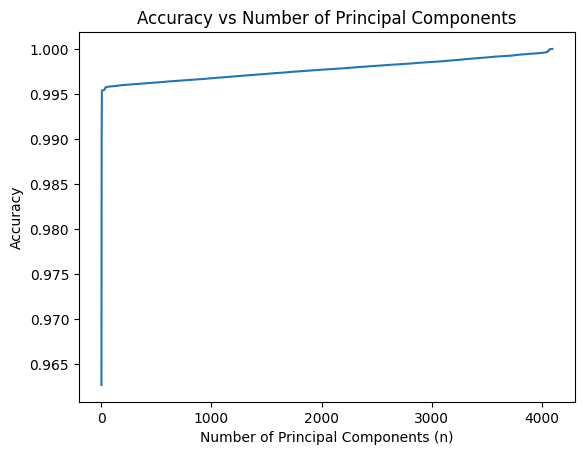

In [ ]:
import matplotlib.pyplot as plt

# Select the top 'n' eigenvectors
n_values = range(1, len(eigenvalues) + 1)
accuracies = []

for n in n_values:
    # Select the top 'n' eigenvectors
    selected_eigenvectors = eigenvectors[:, :n]

    # Project the data onto the selected eigenvectors
    projected_data = X.dot(selected_eigenvectors)

    # Reconstruct the data
    reconstructed_data = projected_data.dot(selected_eigenvectors.T)

    # Calculate the mean squared error (MSE)
    mse = np.mean((X - reconstructed_data)**2)

    # Calculate the accuracy (inverse of MSE)
    accuracy = 1 / (1 + mse)
    accuracies.append(accuracy)

# Plot the accuracy vs n
plt.plot(n_values, accuracies)
plt.xlabel("Number of Principal Components (n)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Principal Components")
plt.show()


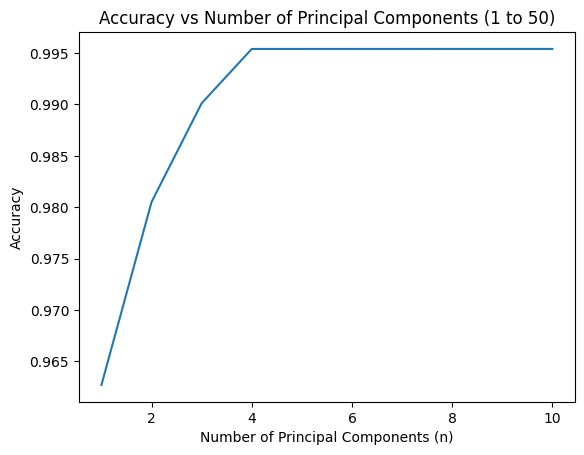

In [ ]:
# Focus on the range 1 to 10
n_values = range(1, 11)
accuracies = []

for n in n_values:
    # Select the top 'n' eigenvectors
    selected_eigenvectors = eigenvectors[:, :n]

    # Project the data onto the selected eigenvectors
    projected_data = X.dot(selected_eigenvectors)

    # Reconstruct the data
    reconstructed_data = projected_data.dot(selected_eigenvectors.T)

    # Calculate the mean squared error (MSE)
    mse = np.mean((X - reconstructed_data)**2)

    # Calculate the accuracy (inverse of MSE)
    accuracy = 1 / (1 + mse)
    accuracies.append(accuracy)

# Plot the accuracy vs n
plt.plot(n_values, accuracies)
plt.xlabel("Number of Principal Components (n)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Principal Components (1 to 50)")
plt.show()


In [ ]:
# Select the top 'n_components' eigenvectors
selected_eigenvectors = eigenvectors[:, :4]  # Select the first 4 eigenvectors

# Project the data onto the selected eigenvectors
df_normalized_pca = df_normalized.drop('label', axis=1) @ selected_eigenvectors

# Add the label column back to the PCA-transformed data
df_normalized_pca['label'] = df_normalized['label']

# Now df_normalized_pca contains the data projected onto the top 4 principal components
print(df_normalized_pca)


           0          1          2         3         label
0 -13.057029  -6.078242  -3.443468 -5.598558  Person 3.jpg
1   1.700983   2.355705 -10.860824  4.557421  Person 1.jpg
2  13.494012   4.294316   3.050412 -5.821991  Person 2.jpg
3  -9.039606  12.460701   5.307020  3.086396  Person 4.jpg
4   6.901640 -13.032480   5.946860  3.776731  Person 5.jpg


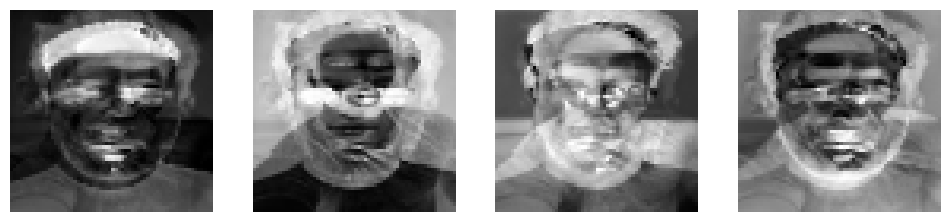

In [ ]:
# Assuming 'selected_eigenvectors' contains the top eigenvectors
eigen_images = selected_eigenvectors.T.reshape(4, 64, 64)

# Display the eigen images
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axes[i].imshow(eigen_images[i], cmap='gray')
    axes[i].axis('off')
plt.show()


           0          1          2         3         4         label
0 -13.057029  -6.078242  -3.443468 -5.598558 -0.018113  Person 3.jpg
1   1.700983   2.355705 -10.860824  4.557421  0.057217  Person 1.jpg
2  13.494012   4.294316   3.050412 -5.821991  0.008515  Person 2.jpg
3  -9.039606  12.460701   5.307020  3.086396 -0.019194  Person 4.jpg
4   6.901640 -13.032480   5.946860  3.776731 -0.028425  Person 5.jpg


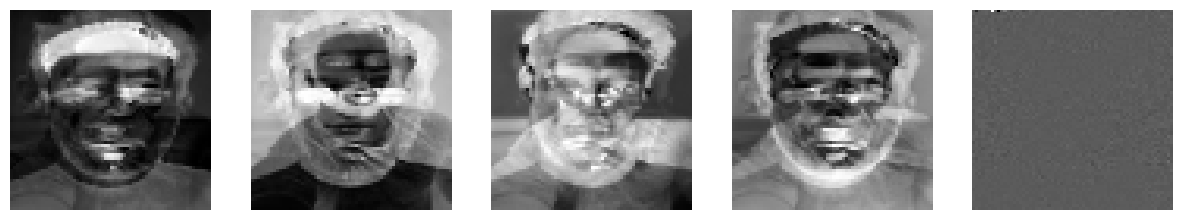

In [ ]:
import matplotlib.pyplot as plt

# Select the top 'n_components' eigenvectors
selected_eigenvectors = eigenvectors[:, :5]  # Select the first 5 eigenvectors

# Project the data onto the selected eigenvectors
df_normalized_pca = df_normalized.drop('label', axis=1) @ selected_eigenvectors

# Add the label column back to the PCA-transformed data
df_normalized_pca['label'] = df_normalized['label']

# Now df_normalized_pca contains the data projected onto the top 5 principal components
print(df_normalized_pca)


# Assuming 'selected_eigenvectors' contains the top eigenvectors
eigen_images = selected_eigenvectors.T.reshape(5, 64, 64) # Reshape to create 5 eigenimages

# Display the eigen images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(eigen_images[i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [ ]:
# prompt: Earlier we worked with n = 4 but do the same works with n = 1000

# Select the top 'n_components' eigenvectors
selected_eigenvectors = eigenvectors[:, :1000]  # Select the first 1000 eigenvectors

# Project the data onto the selected eigenvectors
df_normalized_pca = df_normalized.drop('label', axis=1) @ selected_eigenvectors

# Add the label column back to the PCA-transformed data
df_normalized_pca['label'] = df_normalized['label']

# Now df_normalized_pca contains the data projected onto the top 1000 principal components
print(df_normalized_pca)


           0          1          2         3         4         5         6  \
0 -13.057029  -6.078242  -3.443468 -5.598558 -0.018113 -0.037075  0.003479   
1   1.700983   2.355705 -10.860824  4.557421  0.057217  0.043138 -0.042335   
2  13.494012   4.294316   3.050412 -5.821991  0.008515 -0.027231  0.019263   
3  -9.039606  12.460701   5.307020  3.086396 -0.019194  0.042011  0.042729   
4   6.901640 -13.032480   5.946860  3.776731 -0.028425 -0.020843 -0.023135   

          7         8         9  ...       991       992           993  \
0  0.104419 -0.005113  0.019808  ...  0.004467  0.164018 -3.659480e-07   
1  0.010643  0.000621 -0.000950  ... -0.009679  0.038349 -1.804969e-02   
2 -0.082859 -0.073912  0.016385  ... -0.075620  0.007521 -8.238766e-02   
3 -0.040143  0.080997  0.030898  ...  0.039457  0.005044 -2.027518e-02   
4  0.007941 -0.002592 -0.066140  ...  0.041376 -0.214932  1.207129e-01   

        994       995       996       997       998       999         label  
0 -0.046

In [ ]:
# prompt: Build the eigen image n= 1000

import matplotlib.pyplot as plt
# Assuming 'selected_eigenvectors' contains the top eigenvectors
eigen_images = selected_eigenvectors.T.reshape(1000, 64, 64)

# Display the eigen images (you might want to display a subset due to the large number)
fig, axes = plt.subplots(10, 10, figsize=(20, 20))  # Adjust the subplot grid as needed
for i in range(100):  # Display the first 100 eigen images
    row = i // 10
    col = i % 10
    axes[row, col].imshow(eigen_images[i], cmap='gray')
    axes[row, col].axis('off')
plt.show()


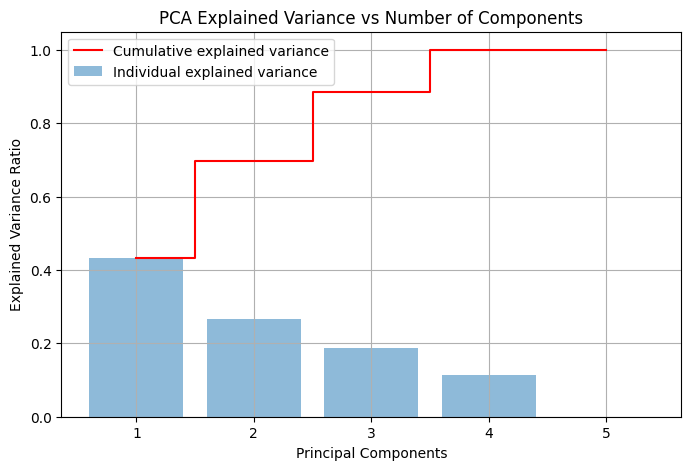

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load example dataset (Iris dataset)

# Transpose the data so that columns become rows (features become samples)
X_transposed = X.T

# Standardize the transposed data
X_mean = np.mean(X_transposed, axis=0)
X_centered = X_transposed - X_mean

# Apply PCA on the transposed data
pca = PCA()
pca.fit(X_centered)

# Get explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot explained variance and cumulative explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.title('PCA Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

In [ ]:
pca.fit(df_normalized.drop('label', axis=1))

PCA()

In [ ]:
pca.explained_variance_ratio_

array([4.35864914e-01, 3.04274836e-01, 1.65184336e-01, 9.46759141e-02,
       3.78406570e-31])

In [ ]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

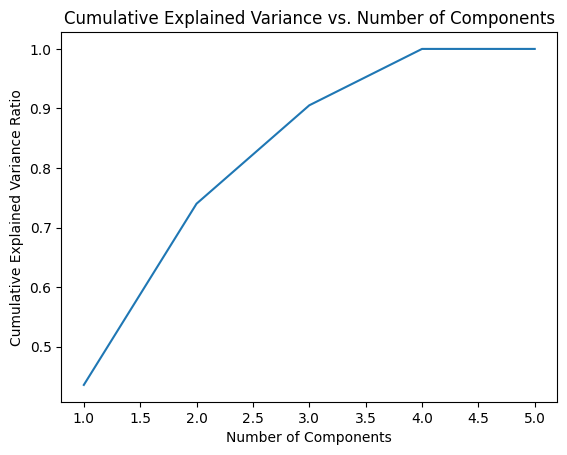

In [ ]:
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

In [ ]:
F1c = img.imread("/content/Person 3.jpg")
print(F1c.shape)
F1c = img.imread("/content/Person 4.jpg")
print(F1c.shape)
F1c = img.imread("/content/Person 5.png")
print(F1c.shape)

(750, 500, 3)
(750, 500, 3)
(527, 429, 4)


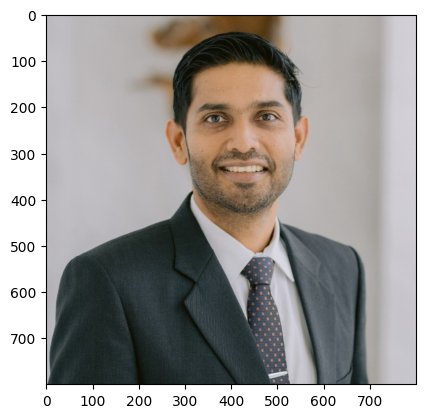

In [ ]:
plt.imshow(F1c)


In [ ]:
F1c.shape

(800, 800, 3)

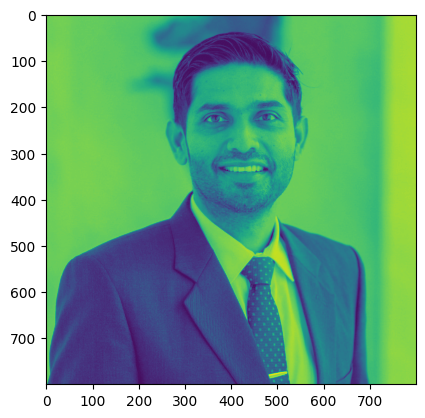

In [ ]:
F1 = rgb2gray(F1c)
plt.imshow(F1)

In [ ]:
F1.shape

(800, 800)

In [ ]:
F1

array([[0.74817843, 0.74817843, 0.74817843, ..., 0.82408706, 0.82408706,
        0.82408706],
       [0.74817843, 0.74817843, 0.74817843, ..., 0.82408706, 0.82408706,
        0.82408706],
       [0.74817843, 0.74817843, 0.74817843, ..., 0.82408706, 0.82408706,
        0.82408706],
       ...,
       [0.72636118, 0.74204745, 0.70872549, ..., 0.78292196, 0.78292196,
        0.78292196],
       [0.72243961, 0.74204745, 0.71656863, ..., 0.78292196, 0.78292196,
        0.78684353],
       [0.70675333, 0.74204745, 0.72441176, ..., 0.78292196, 0.78292196,
        0.78684353]])

In [ ]:
gray_image = F1

In [ ]:
flat_image = gray_image.flatten()

In [ ]:
flat_image

array([0.74817843, 0.74817843, 0.74817843, ..., 0.78292196, 0.78292196,
       0.78684353])

In [ ]:
from PIL import Image
import numpy as np

# Open an image
img = Image.open('/content/1707961376844.jpeg')

# Convert the image to grayscale
gray_img = img.convert('L')  # 'L' mode is for grayscale (luminance)

# Convert the grayscale image to a NumPy array
gray_array = np.array(gray_img)

# Print the array
print(gray_array)


[[191 191 191 ... 211 211 211]
 [191 191 191 ... 211 211 211]
 [191 191 191 ... 211 211 211]
 ...
 [185 189 180 ... 200 200 200]
 [184 189 182 ... 200 200 201]
 [180 189 184 ... 200 200 201]]


ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

In [ ]:
from numpy import linalg as LA
C = np.matmul(B, B.T)
D, V = LA.eig(C)

NameError: name 'B' is not defined

In [ ]:
# import os
# os.chdir('/content/drive/My Drive/Faces')